In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 


In [3]:
import sqlite3

In [4]:
con=sqlite3.connect(r'/Users/anu/Downloads/drive-download-20240122T084941Z-001/database.sqlite')

In [5]:
data=pd.read_sql_query("Select * from Reviews",con)

In [6]:
data.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
data_valid=data[data['HelpfulnessNumerator']<= data['HelpfulnessDenominator']]

In [8]:
data_valid=data_valid.drop_duplicates(subset=['UserId', 'ProfileName','Time','Text'])

In [9]:
data_valid.shape

(393931, 10)

In [10]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [11]:
data_valid['Time']=pd.to_datetime(data_valid['Time'],unit='s')

In [12]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
#top 10 customers who recommend more products

recommend=data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId',ascending=False)

In [14]:
recommend.columns=['Number of reviews','Number of revs','Avg score','Number of products']

In [15]:
recommend.index[0:10]

Index(['A3OXHLG6DIBRW8', 'A1YUL9PCJR3JTY', 'AY12DBB0U420B', 'A281NPSIMI1C2R',
       'A1Z54EM24Y40LL', 'A1TMAVN4CEM8U8', 'A2MUGFV2TDQ47K', 'A3TVZM3ZIXG8YW',
       'A3PJZ8TU8FDQ1K', 'AQQLWCMRNDFGI'],
      dtype='object', name='UserId')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'A3OXHLG6DIBRW8'),
  Text(1, 0, 'A1YUL9PCJR3JTY'),
  Text(2, 0, 'AY12DBB0U420B'),
  Text(3, 0, 'A281NPSIMI1C2R'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A1TMAVN4CEM8U8'),
  Text(6, 0, 'A2MUGFV2TDQ47K'),
  Text(7, 0, 'A3TVZM3ZIXG8YW'),
  Text(8, 0, 'A3PJZ8TU8FDQ1K'),
  Text(9, 0, 'AQQLWCMRNDFGI')])

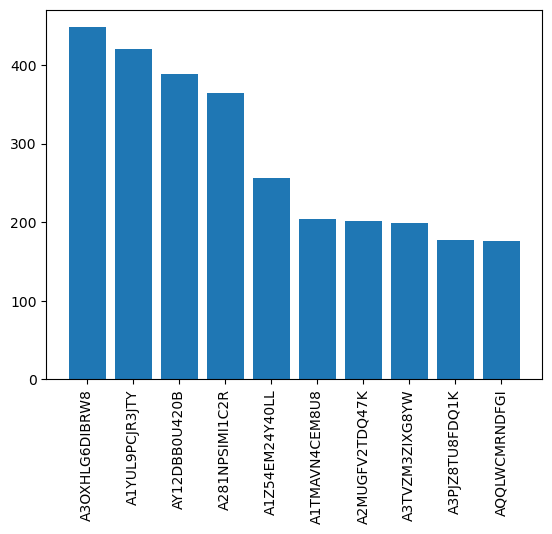

In [16]:
plt.bar(recommend.index[0:10],recommend['Number of products'][0:10])
plt.xticks(rotation='vertical')

In [17]:
#good number of reviews and finding most freq sold products

In [18]:
df=(data_valid['ProductId'].value_counts().to_frame())

In [19]:
# product_data=data_valid['ProductId'].value_counts()

In [20]:
# product_data=product_data>500
df

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1


In [21]:
freq_ids=df.index[0:11]

In [22]:
freq_prod=data_valid[data_valid['ProductId'].isin(freq_ids)]

<Axes: xlabel='count', ylabel='ProductId'>

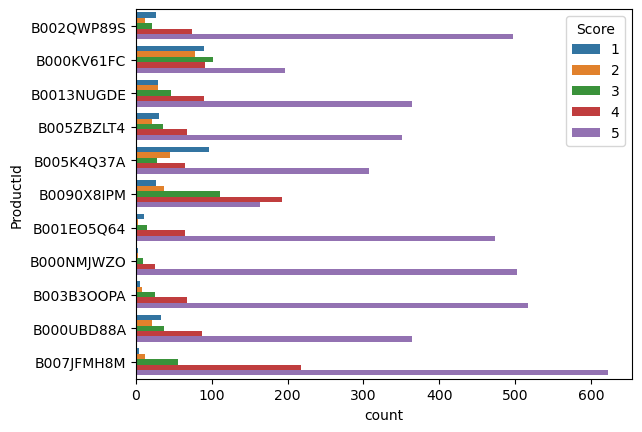

In [23]:
sb.countplot(y='ProductId',data=freq_prod,hue='Score')

In [27]:
#Understanding user's behaviours
x=data['UserId'].value_counts()

In [29]:
data['ViewerType']=data['UserId'].apply(lambda user: 'Frequent' if x[user]>50 else 'Not Frequent')

In [63]:
freq_data=data[data['ViewerType']=='Frequent']
non_freq=data[data['ViewerType']=='Not Frequent']

<Axes: xlabel='Score'>

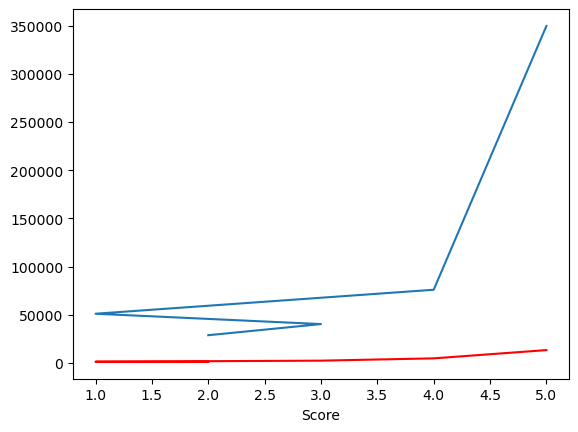

In [41]:
freq_data['Score'].value_counts().plot(kind='line',color='red')
non_freq['Score'].value_counts().plot(kind='line')

In [62]:
#Users that are more descriptive in reviews

# data[['UserId','Text','ProductId','Textlen']]
def calLen(text):
   return len(text.split(' '))

In [60]:
# data[['UserId','Text','ProductId','Textlen']]
data['Textlen']=data['Text'].apply(calLen)

(0.0, 600.0)

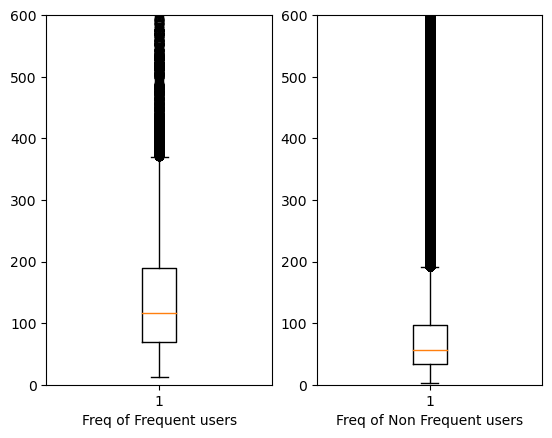

In [67]:
fig=plt.figure()

ax1=fig.add_subplot(121)
ax1.boxplot(freq_data['Textlen'])
ax1.set_xlabel('Freq of Frequent users')
ax1.set_ylim(0,600)

ax2=fig.add_subplot(122)
ax2.boxplot(non_freq['Textlen'])
ax2.set_xlabel('Freq of Non Frequent users')
ax2.set_ylim(0,600)

In [70]:
#Sentiment analysis
!pip install textblob  


In [71]:
from textblob import TextBlob

In [73]:
data['Summary'][0]

'Good Quality Dog Food'

In [74]:
def sentiment(Summary):
    return TextBlob(Summary).sentiment.polarity

In [77]:
data['Sentiment']=data['Summary'].apply(sentiment)

In [83]:
sample = data[0:50000]


In [85]:
polarity = []

for text in sample['Summary']: 
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [88]:
sample['polarity'] = polarity
sample_negative= sample[sample['polarity']<0]

sample_positive= sample[sample['polarity']>0]

In [90]:
from collections import Counter

In [92]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 43),
 ('Disappointing', 32),
 ('Bland', 20),
 ('Awful', 18),
 ('disappointed', 18),
 ('Not what I expected', 17),
 ('Terrible', 17),
 ('Horrible', 14),
 ('Disgusting', 12),
 ("Don't waste your money", 11)]

In [93]:
Counter(sample_positive['Summary']).most_common(10) 

[('Delicious!', 204),
 ('Delicious', 195),
 ('Great product', 96),
 ('Great', 82),
 ('Love it!', 81),
 ('Excellent', 78),
 ('Great Product', 74),
 ('Great!', 67),
 ('Good stuff', 53),
 ('Awesome', 52)]